# The Python symbolic math library

The [`sympy`](http://sympy.org) library allows you to perform symbolic mathematical manipulations in a wide variety of contexts. This library works in a way similar to Mathematica - using functions and methods to perform these manipulations. In this computational problem, you will use a few `sympy` tools to compute the gradient of some scalar functions.

To perform computational tasks with Python, you will often need to import a variety of libraries. The first of these you will learn about is `sympy`. In this problem, you will learn about two ways to compute the gradient symbolically with sympy. You may use either of these to solve the problem posed.

### [Skip to problem to solve](./HW1-GradientProblem.ipynb#Problems-to-solve)

### Getting Started with Jupyter and Python Libraries

First things first, you will need to import methods, functions, and classes from the `sympy` library and set up the printing of the symbolic math. With `sympy`, mathematical symbols are typically printed in plain text unless you specify otherwise. We will use [mathjax](https://www.mathjax.org/) for printing the mathematical symbols, which makes the symbols look like the mathematical symbols you see in your textbook. 

The two lines below: (1) import all the methods from sympy and (2) set the printing method to use mathjax.

In [17]:
from sympy import *                # import methods from sympy
import matplotlib.pyplot as plt
% matplotlib inline
init_printing(use_latex='mathjax') # set up printing using mathjax

### Specifying symbolic variables

To perform symbolic manipulations, `sympy` needs to know which variables are symbolic, that is, which ones are meant to represent variables that appear in your mathematical functions. In this problem, you will use functions of three variables $(x, y, z)$. So, you need to tell `sympy` that $x, y,$ and $z$ are variables. You do this with the `symbols` function.

In [2]:
x, y, z = symbols('x y z')

### Constructing scalar functions

With the symbolic variables specified, you may now construct a scalar function of these variables by assigning a new variable to a mathematical function that you specify. For example, below three different functions are constructed to illustrate some of the mathematical syntax that Python uses. 

* $f(x,y,z) = x^2+y+z^3$
* $g(x,y,z) = e^{x}\sin(y)\log(z)$
* $h(x,y,z) = \dfrac{\sqrt{x}}{x^2+y^2+z^2}$

Notice that Jupyter will not print the function when the assignment is performed. But if you call the function by its name alone, it will.

In [3]:
f = x**2 + y + z **3    # Two stars indiciate that a quantity is raised to a power
f

 2        3
x  + y + z 

In [4]:
g = exp(x)*sin(y)*log(z)   # Known mathematical functions such as e, sin, etc. are defined in Python
g

 x              
ℯ ⋅log(z)⋅sin(y)

In [5]:
h = sqrt(x)/(x**2+y**2+z**2)    #Pay attention to parantheses to ensure proper order of operations
h

     √x     
────────────
 2    2    2
x  + y  + z 

### Method 1 - Computing the gradient using the `diff` function

The function `diff` can be used to [compute derivatives with respect to specified variables](http://docs.sympy.org/latest/tutorial/calculus.html#derivatives). To compute the gradient of the function $f$, you would compute partial derivatives with respect to each variable:

$$\nabla f(x,y,z,) = \dfrac{\partial f}{\partial x} \hat{x} + \dfrac{\partial f}{\partial y} \hat{y} + \dfrac{\partial f}{\partial z} \hat{z}$$

Because the `diff` function computes a derivative with respect to a single variable, it can be used to compute each of the partial derivatives that form the gradient. For example,

$$\dfrac{\partial f}{\partial x} = 2x$$
$$\dfrac{\partial f}{\partial y} = 1$$
$$\dfrac{\partial f}{\partial z} = 3z^2$$

To compute the first of these partial derivatives, we call `diff(f,x)`. The others are similarly called.

In [6]:
diff(f,x)

2⋅x

In [7]:
diff(f,y)

1

In [8]:
diff(f,z)

   2
3⋅z 

### Simplifying your work with `sympy.vector`

As you can tell, computing gradients one partial derivative at a time can be somewhat time consuming. Not to mention that performing more sophisticated vector operations (like taking the divergence or curl of a vector field) are pretty difficult to do with just the `diff` function. Fortunately, [sympy has a vector library](http://docs.sympy.org/dev/modules/physics/vector/index.html) to help with these kinds of calculations. To do these kinds of calculations, you will first import the Cartesian coordinate system class (`CoordSysCartesian`) and then construct a Cartesian coordinate system that we can call `R`.

*All that the two statements below do is provide you with the tools that will allow you to specify vector and scalar functions in a Cartesian Coordinate System that we call "R." You will get more practice with specifiying vector functions using sympy.vector in another homework problem.*

In [9]:
from sympy.vector import CoordSysCartesian   # import the Cartesian coordinate system class
R = CoordSysCartesian('R')                   # construct a coordinate system called 'R'

C:\Users\anime\Anaconda3\lib\site-packages\sympy\vector\coordsysrect.py:20: SymPyDeprecationWarning: 

CoordSysCartesian has been deprecated since SymPy 1.1. Use CoordSys3D
instead. See https://github.com/sympy/sympy/issues/12865 for more
info.

  deprecated_since_version="1.1"


### Method 2 - Computing gradients with the `delop` method

The `sympy.vector` library has a method called `delop`, which stands for *del operator*. This method will allow the del operator to act on scalar and vector functions in different ways depending on how it is called. 

In this example, we use the `delop` method to compute the gradient of the same function $f(x,y,z) = x^2+y+z^3$ above. To use the `delop` method, we have to construct the scalar function $f$ in a slightly different way than was done before.

In [10]:
f = R.x**2 + R.y + R.z**3 ## Rewriting the function f (it replaces the old definition) so we can use the delop method

When we define the function $f$ again, we have to use the "dot structure" to specify each variable in the function using the coordinate system (`R`) that we initialized above. So, `x` becomes `R.x`, `y` becomes `R.y`, and `z` becomes `R.z`. 

The gradient of this function is taken by using the `delop` method. Simply calling the `delop` method (below) doesn't perform the calculation, but shows you what calculation will be performed.

In [11]:
R.delop(f)   # Shows the calculation that will be performed

C:\Users\anime\Anaconda3\lib\site-packages\sympy\vector\coordsysrect.py:335: SymPyDeprecationWarning: 

coord_system.delop has been replaced. has been deprecated since SymPy
1.1. Use Use the Del() class instead. See
https://github.com/sympy/sympy/issues/12866 for more info.

  issue=12866,


⎛ ∂  ⎛   2            3⎞ R_i⎞ R_i + ⎛ ∂  ⎛   2            3⎞ R_j⎞ R_j + ⎛ ∂  ⎛
⎜────⎝R_x  + R_y + R_z ⎠⎟           ⎜────⎝R_x  + R_y + R_z ⎠⎟           ⎜────⎝
⎝∂R_x                   ⎠           ⎝∂R_y                   ⎠           ⎝∂R_z 

   2            3⎞ R_k⎞ R_k
R_x  + R_y + R_z ⎠⎟        
                  ⎠        

To indicate that you want the gradient computed, you must use the `doit()` method. This call is very similar to the one above with the addition of `.doit()` to the end.

In [12]:
R.delop(f).doit()    # Do the calculation

C:\Users\anime\Anaconda3\lib\site-packages\sympy\vector\coordsysrect.py:335: SymPyDeprecationWarning: 

coord_system.delop has been replaced. has been deprecated since SymPy
1.1. Use Use the Del() class instead. See
https://github.com/sympy/sympy/issues/12866 for more info.

  issue=12866,


(2⋅R_x) R_i + R_j + ⎛     2⎞ R_k
                    ⎝3⋅R_z ⎠    

Notice that the full gradient has been taken (i.e., all partial derivatives have been taken). The components are clearly specified including the unit vectors ($\hat{i},\hat{j},\hat{k}$). To see how the whole calculation hangs together, we can perform all this work in two lines for the function $g(x,y,z) = e^x\sin(y)\log(z)$ above.

In [13]:
g = exp(R.x)*sin(R.y)*log(R.z)   # Construct the function g(x,y,z)
R.delop(g).doit()                # Take the gradient of g(x,y,z)

C:\Users\anime\Anaconda3\lib\site-packages\sympy\vector\coordsysrect.py:335: SymPyDeprecationWarning: 

coord_system.delop has been replaced. has been deprecated since SymPy
1.1. Use Use the Del() class instead. See
https://github.com/sympy/sympy/issues/12866 for more info.

  issue=12866,


⎛ R_x                  ⎞ R_i + ⎛ R_x                  ⎞ R_j + ⎛ R_x         ⎞ 
⎝ℯ   ⋅log(R_z)⋅sin(R_y)⎠       ⎝ℯ   ⋅log(R_z)⋅cos(R_y)⎠       ⎜ℯ   ⋅sin(R_y)⎟ 
                                                              ⎜─────────────⎟ 
                                                              ⎝     R_z     ⎠ 

R_k
   
   
   

# Problems to solve

Using what you've learned about either the `diff` function or the methods of `sympy.vector`, compute the gradients of:

1. the magnitude of the separation vector, $|\vec{\mathfrak{r}}|$, and
2. the inverse of the magntiude of the separation vector, $\dfrac{1}{|\vec{\mathfrak{r}}|}$.

Check these answers against what you obtained by hand. (*Hint: you will need to create three additional symoblic variables for the source location.*)

In [14]:
xp, yp, zp = symbols('xp yp zp')
r = ((R.x-xp)**2+(R.y-yp)**2+(R.z-zp)**2)**(1/2)
R.delop(r).doit()

C:\Users\anime\Anaconda3\lib\site-packages\sympy\vector\coordsysrect.py:335: SymPyDeprecationWarning: 

coord_system.delop has been replaced. has been deprecated since SymPy
1.1. Use Use the Del() class instead. See
https://github.com/sympy/sympy/issues/12866 for more info.

  issue=12866,


⎛                                                                -0.5⎞ R_i + ⎛
⎜                    ⎛           2              2              2⎞ R_i    ⎟   ⎜
⎝(-1.0⋅xp + 1.0⋅R_x)⋅⎝(-xp + R_x)  + (-yp + R_y)  + (-zp + R_z) ⎠    ⎠       ⎝

                                                                -0.5⎞ R_j + ⎛ 
                    ⎛           2              2              2⎞ R_j    ⎟   ⎜ 
(-1.0⋅yp + 1.0⋅R_y)⋅⎝(-xp + R_x)  + (-yp + R_y)  + (-zp + R_z) ⎠    ⎠       ⎝(

                                                               -0.5⎞ R_k
                   ⎛           2              2              2⎞ R_k    ⎟
-1.0⋅zp + 1.0⋅R_z)⋅⎝(-xp + R_x)  + (-yp + R_y)  + (-zp + R_z) ⎠    ⎠    

TypeError: can't convert expression to float

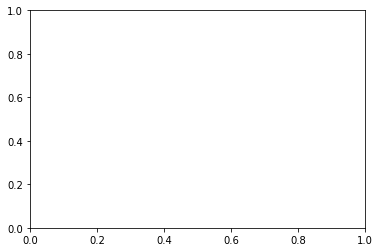

In [18]:
rp = 1/r
plt.plot(rp)